In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [ ]:
data=pd.read_excel("/content/car_data.xlsx")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
data.shape

(11914, 16)

In [ ]:
data.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [ ]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

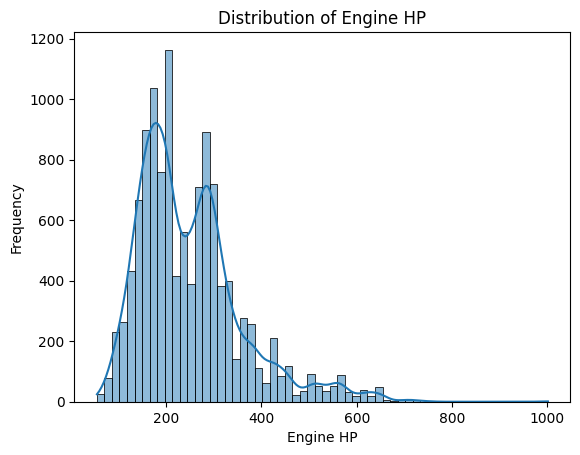

In [ ]:
#plt.figure(figsize=(8, 10))
sns.histplot(data['Engine HP'], bins=60, kde=True)
plt.title('Distribution of Engine HP')
plt.xlabel('Engine HP')
plt.ylabel('Frequency')
plt.show()

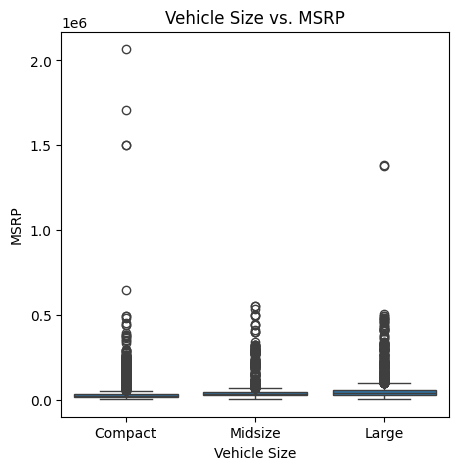

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data, x='Vehicle Size', y='MSRP')
plt.title('Vehicle Size vs. MSRP')
plt.xlabel('Vehicle Size')
plt.ylabel('MSRP')
plt.show()

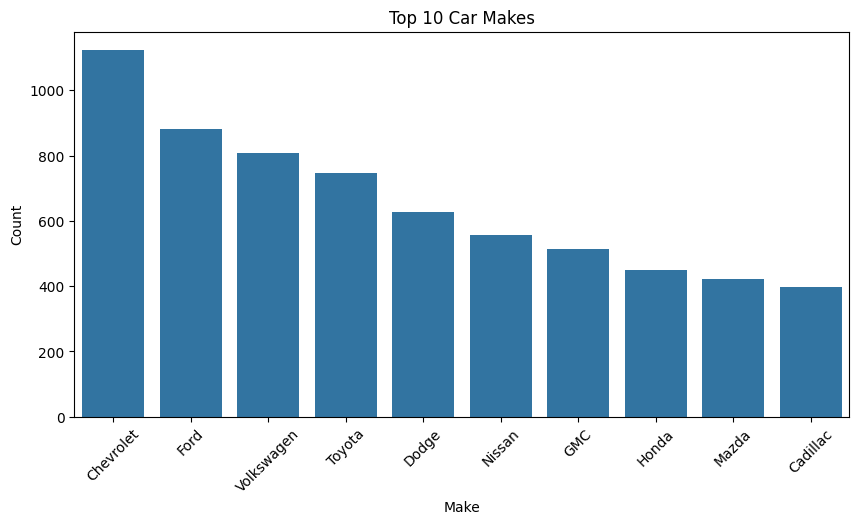

In [ ]:
plt.figure(figsize=(10, 5))
top_makes = data['Make'].value_counts().head(10)
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title('Top 10 Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

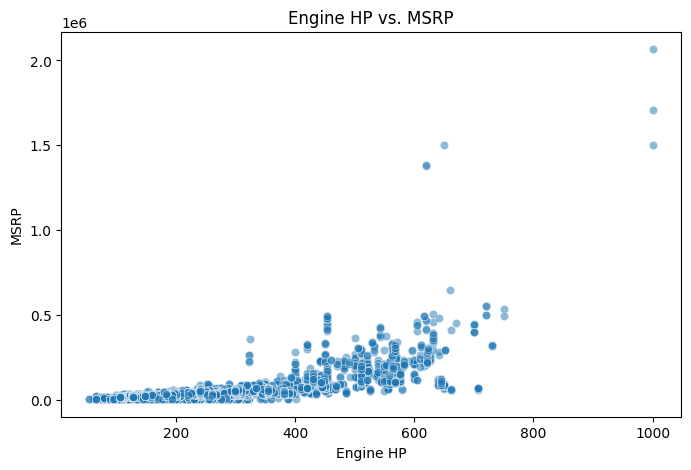

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Engine HP', y='MSRP', alpha=0.5)
plt.title('Engine HP vs. MSRP')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

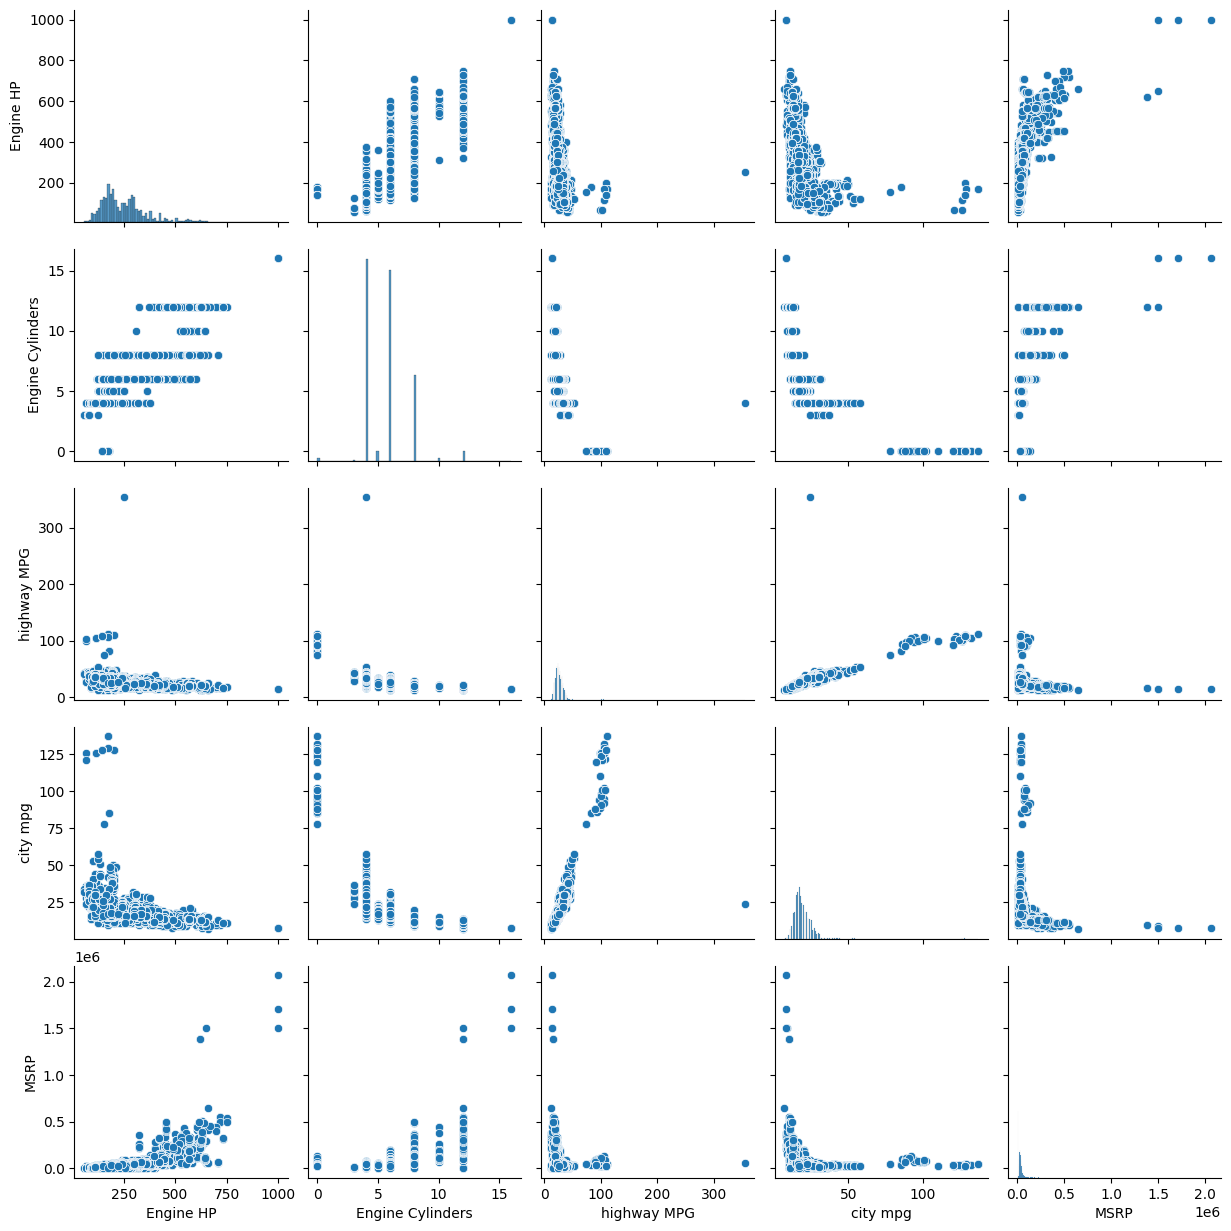

In [ ]:
sns.pairplot(data, vars=['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP'], palette='Set2')
plt.show()

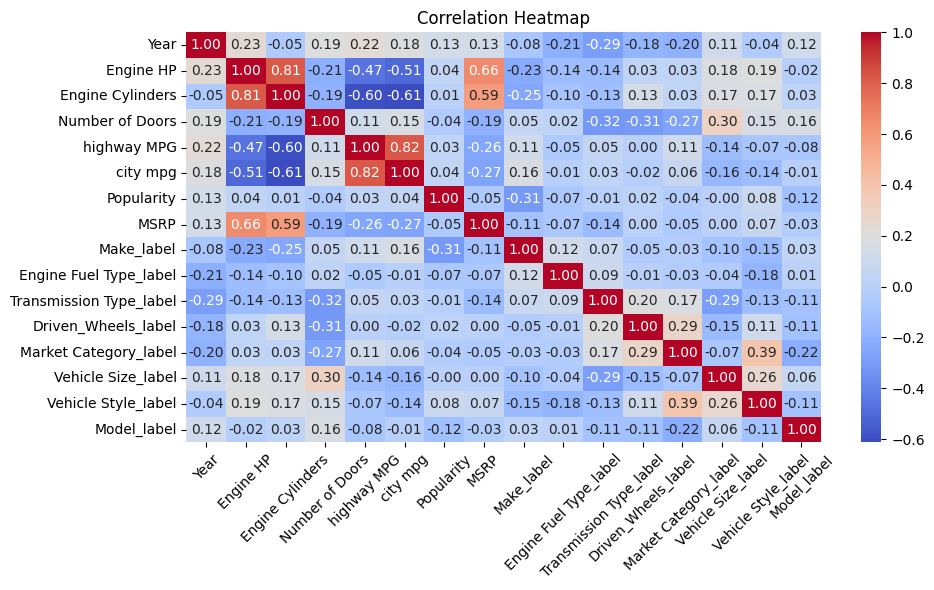

In [ ]:
plt.figure(figsize=(10, 6))
numeric_cols = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df=data.drop_duplicates(inplace=True)
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
data = data.dropna()
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
lcoder= LabelEncoder()
data['Make_label'] = lcoder.fit_transform(data['Make'])
data['Engine Fuel Type_label'] = lcoder.fit_transform(data['Engine Fuel Type'])
data['Transmission Type_label'] = lcoder.fit_transform(data['Transmission Type'])
data['Driven_Wheels_label'] = lcoder.fit_transform(data['Driven_Wheels'])
data['Market Category_label'] = lcoder.fit_transform(data['Market Category'])
data['Vehicle Size_label'] = lcoder.fit_transform(data['Vehicle Size'])
data['Vehicle Style_label'] = lcoder.fit_transform(data['Vehicle Style'])
data['Model_label'] = lcoder.fit_transform(data['Model'])

/tmp/ipython-input-4215095479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Make_label'] = lcoder.fit_transform(data['Make'])
/tmp/ipython-input-4215095479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Engine Fuel Type_label'] = lcoder.fit_transform(data['Engine Fuel Type'])
/tmp/ipython-input-4215095479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
data['Model'] = data['Model'].astype(str)

/tmp/ipython-input-2619092412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Model'] = data['Model'].astype(str)


In [ ]:
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,Popularity,MSRP,Make_label,Engine Fuel Type_label,Transmission Type_label,Driven_Wheels_label,Market Category_label,Vehicle Size_label,Vehicle Style_label,Model_label
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,3916,46135,4,6,3,3,37,0,8,1
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,3916,40650,4,6,3,3,66,0,6,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",...,3916,36350,4,6,3,3,63,0,8,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,3916,29450,4,6,3,3,66,0,8,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,...,3916,34500,4,6,3,3,62,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,204,46120,0,6,1,0,13,2,2,703
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,204,56670,0,6,1,0,13,2,2,703
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,204,50620,0,6,1,0,13,2,2,703
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",...,204,50920,0,5,1,0,13,2,2,703


In [ ]:
X = data.drop(['Make','Model','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style','MSRP'],axis=1)
Y = data['MSRP']

In [ ]:
X

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make_label,Engine Fuel Type_label,Transmission Type_label,Driven_Wheels_label,Market Category_label,Vehicle Size_label,Vehicle Style_label,Model_label
0,2011,335.0,6.0,2.0,26,19,3916,4,6,3,3,37,0,8,1
1,2011,300.0,6.0,2.0,28,19,3916,4,6,3,3,66,0,6,0
2,2011,300.0,6.0,2.0,28,20,3916,4,6,3,3,63,0,8,0
3,2011,230.0,6.0,2.0,28,18,3916,4,6,3,3,66,0,8,0
4,2011,230.0,6.0,2.0,28,18,3916,4,6,3,3,62,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,0,6,1,0,13,2,2,703
11910,2012,300.0,6.0,4.0,23,16,204,0,6,1,0,13,2,2,703
11911,2012,300.0,6.0,4.0,23,16,204,0,6,1,0,13,2,2,703
11912,2013,300.0,6.0,4.0,23,16,204,0,5,1,0,13,2,2,703


In [ ]:
Y

,MSRP
0,46135
1,40650
2,36350
3,29450
4,34500
...,...
11909,46120
11910,56670
11911,50620
11912,50920


In [ ]:
X.shape

(7735, 15)

In [ ]:
Y.shape

(7735,)

In [ ]:
scaler_s = StandardScaler()
scaler_m = MinMaxScaler()
X_scaled_s = scaler_s.fit_transform(X)
X_scaled_m = scaler_m.fit_transform(X)

In [ ]:
Xtrain, Xtest, Ytrian, Ytest = train_test_split(X,Y,test_size=0.2)

In [ ]:
liner = LinearRegression()
liner_model = liner.fit(Xtrain,Ytrian)

In [ ]:
def result(model):
  Y_pre = model.predict(Xtest)
  mse = mean_squared_error(Ytest,Y_pre)
  r2 = r2_score(Ytest, Y_pre)
  return mse,r2

In [ ]:
models = [liner_model]
for i in models:
  mse, r2 = result(i)
  print("\tmodel: ",i)
  print("MSE: ",mse)
  print("R2: ",r2)

	model:  LinearRegression()
MSE:  3277510718.1588697
R2:  0.4612334633845111


In [ ]:
ridge = Ridge(alpha=1.0)
ridge_model = ridge.fit(Xtrain, Ytrian)

lasso = Lasso(alpha=0.1)
lasso_model= lasso.fit(Xtrain, Ytrian)

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(Xtrain, Ytrian)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
DecisionTree = DecisionTreeRegressor()
DT_model = DecisionTree.fit(Xtrain,Ytrian)

RandomForest = RandomForestRegressor()
RF_model = RandomForest.fit(Xtrain,Ytrian)

Gradient_Boosting =  GradientBoostingRegressor()
GB_model = Gradient_Boosting.fit(Xtrain,Ytrian)

AdaBoost = AdaBoostRegressor()
AD_model = AdaBoost.fit(Xtrain,Ytrian)

SVR = SVR()
SVR_model = SVR.fit(Xtrain,Ytrian)

KNN = KNeighborsRegressor()
Knn_model = KNN.fit(Xtrain,Ytrian)

In [ ]:
models = [ridge_model, lasso_model, poly_model, DT_model, RF_model, GB_model, AD_model, SVR_model, Knn_model]
for i in models:
  mse, r2 = result(i)
  print("\tmodel: ",i)
  print("MSE: ",mse)
  print("R2: ",r2)

	model:  Ridge()
MSE:  3277517916.841707
R2:  0.46123228004454553
	model:  Lasso(alpha=0.1)
MSE:  3277511248.2836537
R2:  0.46123337624109084
	model:  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
MSE:  2068356373.5132778
R2:  0.659997694692419
	model:  DecisionTreeRegressor()
MSE:  945580009.8347944
R2:  0.8445628677371002
	model:  RandomForestRegressor()
MSE:  1046303562.8086036
R2:  0.8280056435331805
	model:  GradientBoostingRegressor()
MSE:  1087370696.1125321
R2:  0.8212549113215974
	model:  AdaBoostRegressor()
MSE:  2156041910.752634
R2:  0.6455836966090642
	model:  SVR()
MSE:  6334584557.332861
R2:  -0.04129703190394096
	model:  KNeighborsRegressor()
MSE:  1582493001.7802458
R2:  0.739865298055735
